# Welcome on board everyone 💅

Hello, hello, hello!

This notebook presents a data analysis project focused on salaries for data science jobs in 2025. It guides you through essential steps, including data preprocessing, data cleaning, insightful data analysis, and compelling data visualization.

A key point to note is that the data used for most of the analysis is specifically filtered for the year 2025. This means it represents a partial-year dataset. Additionally, I've prioritized creating reusable functions throughout, allowing you to easily adapt and apply them for your own interests.

I hope you have fun exploring my project and find it insightful!

I appreciate your engagement! :)

# Import libralies

In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/salaries-for-data-science-jobs/DataScience_Salaries.csv
/kaggle/input/salaries-for-data-science-jobs/salaries.csv


# Read the data file

In [2]:
def show_df(filepath):
    """reads a csv file and displays Dataframe"""
    df = pd.read_csv(filepath)
    return df

filepath = "/kaggle/input/salaries-for-data-science-jobs/salaries.csv"
df = show_df(filepath)
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
77346,2024,MI,FT,Machine Learning Engineer,214500,USD,214500,US,0,US,M
39474,2025,SE,FT,Machine Learning Engineer,181000,USD,181000,US,0,US,M
6336,2025,SE,FT,Consultant,139450,USD,139450,US,0,US,M
39948,2025,MI,FT,Data Scientist,176000,USD,176000,US,0,US,M
88520,2024,SE,FT,Engineer,160000,USD,160000,US,0,US,M


# Get overview of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           133349 non-null  int64 
 1   experience_level    133349 non-null  object
 2   employment_type     133349 non-null  object
 3   job_title           133349 non-null  object
 4   salary              133349 non-null  int64 
 5   salary_currency     133349 non-null  object
 6   salary_in_usd       133349 non-null  int64 
 7   employee_residence  133349 non-null  object
 8   remote_ratio        133349 non-null  int64 
 9   company_location    133349 non-null  object
 10  company_size        133349 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.2+ MB


In [4]:
df.shape

(133349, 11)

In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
df.duplicated().sum()

68726

## Get unique values in a column

In [7]:
def unique_values(dataframe, column_name):
    """
    Returns the unique values in a given column, with formatting for string values.
    
    Parameters:
    - dataframe: pandas DataFrame
    - column_name: string name of the column to analyze
    
    Returns:
    - List of unique values
    """
    if dataframe[column_name].dtype == 'string':
        cleaned_col = dataframe[column_name].str.strip().str.upper()
    else:
        cleaned_col = dataframe[column_name]

    unique_vals = cleaned_col.unique()

    print(f"Unique values in '{column_name}':")
    print(unique_vals)
    print(f"Total: {len(unique_vals)} unique values\n")

    return unique_vals

In [8]:
unique_values(df, 'work_year')
unique_values(df, 'experience_level')
unique_values(df, 'salary_currency')
unique_values(df, 'company_location')
unique_values(df, 'company_size')

Unique values in 'work_year':
[2025 2024 2022 2023 2020 2021]
Total: 6 unique values

Unique values in 'experience_level':
['SE' 'MI' 'EN' 'EX']
Total: 4 unique values

Unique values in 'salary_currency':
['USD' 'GBP' 'MXN' 'EUR' 'PHP' 'CAD' 'PLN' 'JPY' 'INR' 'SGD' 'HUF' 'AUD'
 'CHF' 'TWD' 'NOK' 'BRL' 'CZK' 'ZAR' 'DKK' 'ILS' 'TRY' 'SEK' 'NZD' 'HKD'
 'THB' 'CLP']
Total: 26 unique values

Unique values in 'company_location':
['US' 'AU' 'CA' 'JP' 'GB' 'MX' 'NL' 'ES' 'FR' 'MT' 'LT' 'PH' 'NZ' 'DE'
 'LV' 'IE' 'MK' 'AT' 'PL' 'SK' 'BR' 'SI' 'FI' 'HK' 'LS' 'IN' 'JM' 'CH'
 'BE' 'PE' 'SG' 'PT' 'IT' 'HU' 'RO' 'AR' 'ZA' 'PA' 'EE' 'LU' 'DZ' 'EG'
 'CL' 'GR' 'KE' 'CD' 'SE' 'KR' 'TW' 'NO' 'CZ' 'TR' 'CY' 'CO' 'DK' 'AE'
 'BG' 'ID' 'JO' 'RS' 'UA' 'PR' 'SV' 'EC' 'DO' 'MY' 'XK' 'CR' 'ZM' 'AM'
 'IL' 'LB' 'NG' 'HR' 'PK' 'HN' 'VE' 'AS' 'SA' 'OM' 'BA' 'VN' 'GI' 'MU'
 'RU' 'QA' 'GH' 'AD' 'CF' 'TH' 'IR' 'BS' 'IQ' 'CN' 'MD']
Total: 95 unique values

Unique values in 'company_size':
['M' 'L' 'S']
Total: 3 unique va

array(['M', 'L', 'S'], dtype=object)

In [9]:
df["company_location"].value_counts().head(10)

company_location
US    119641
CA      5239
GB      3719
AU       522
NL       404
DE       395
FR       364
LT       338
AT       297
ES       260
Name: count, dtype: int64

# Data Preprocessing

In [10]:
def preprocess(filename = filepath):
    """prepares and transforms dataframe"""

    # change data types
    dtype_mapper = {"experience_level" : "string",
                    "employment_type" : "string",
                    "job_title" : "string",
                    "salary_currency" : "string",
                    "employee_residence" : "string",
                    "company_location" : "string",
                    "company_size" : "string"}
    
    # read the data file
    df = (pd.read_csv(filename, dtype=dtype_mapper)
        .drop("salary", axis = 1))

    # Standardizes currency values
    df["salary_currency"] = df["salary_currency"].str.strip().str.upper()

    # Keeps only rows where currency is USD
    df = df[df["salary_currency"] == "USD"]

    # removes duplicated rows
    df = df.drop_duplicates()

    return df
    
filepath = "/kaggle/input/salaries-for-data-science-jobs/salaries.csv"
sa = preprocess()
sa.sample(3)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
87515,2024,MI,FT,Data Engineer,USD,137000,DE,0,DE,M
22811,2025,SE,FT,Engineer,USD,320000,US,0,US,M
21234,2025,MI,FT,Platform Engineer,USD,132825,US,0,US,M


In [11]:
# recheck data type and duplicated rows
sa.info()
print(f"There are {sa.duplicated().sum()} of duplicated rows")

<class 'pandas.core.frame.DataFrame'>
Index: 59299 entries, 0 to 133347
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           59299 non-null  int64 
 1   experience_level    59299 non-null  string
 2   employment_type     59299 non-null  string
 3   job_title           59299 non-null  string
 4   salary_currency     59299 non-null  string
 5   salary_in_usd       59299 non-null  int64 
 6   employee_residence  59299 non-null  string
 7   remote_ratio        59299 non-null  int64 
 8   company_location    59299 non-null  string
 9   company_size        59299 non-null  string
dtypes: int64(3), string(7)
memory usage: 5.0 MB
There are 0 of duplicated rows


In [12]:
sa.shape

(59299, 10)

# The Main Reveal 🎬

## General Descriptive Insights

## 1. Top 10 average highest and lowest paid data science jobs in 2025 (globally) 🌏

In [13]:
def paid_summary(dataframe, top_n = 10, ascending=False):
    """
    Sorts a salary summary DataFrame by a specified column and prints the top N job titles.
    Args:
        df_summary (pd.DataFrame): The DataFrame containing aggregated county data
                                   (e.g., from a groupby.sum()).
        column_name (str): The name of the column to sort by.
        top_n (int, optional): The number of top records to display. Defaults to 10.
    """
    # Keeps only work_year == 2025
    df_2025 = dataframe[dataframe["work_year"] == 2025]
    
    salary_summary = df_2025.groupby("job_title")["salary_in_usd"].mean().round(2)
    sorted_df = salary_summary.sort_values(ascending = ascending)

    # Display result
    label = "lowest" if ascending else "highest"
    print(f"\nTop {top_n} {label} paid job titles in USD for 2025:")
    print(sorted_df.head(top_n).to_string())

In [14]:
paid_summary(sa, top_n=10, ascending=False)
paid_summary(sa, top_n=10, ascending=True)


Top 10 highest paid job titles in USD for 2025:
job_title
Research Team Lead                450000.00
Head of Applied AI                278500.00
Head of AI                        264315.17
Director of Machine Learning      261650.00
Director of Product Management    261555.25
Head of Data                      254481.70
Enterprise Account Executive      249416.67
Head of Machine Learning          247750.00
Engineering Manager               247717.52
Machine Learning Architect        246320.00

Top 10 lowest paid job titles in USD for 2025:
job_title
Clinical Aide               35000.00
Clinical Data Operator      36000.00
AI Content Writer           40506.67
Data Operator               42000.00
Data Integration Analyst    49000.00
Research Assistant          49780.09
Trainee                     55000.00
Data & Analytics Analyst    55000.00
Cientista de Dados          60000.00
Research Data Manager       60000.00


## 2. Top 10 average highest and lowest paid data science jobs in 2025 (USA) 🇺🇸

In [15]:
def paid_summary(dataframe, headquater, top_n = 10, ascending=False):
    """
    Sorts a salary summary DataFrame by a specified column and prints the top N job titles.
    Args:
        df_summary (pd.DataFrame): The DataFrame containing aggregated county data
                                   (e.g., from a groupby.sum()).
        column_name (str): The name of the column to sort by.
        top_n (int, optional): The number of top records to display. Defaults to 10.
    """
    # Keeps only work_year == 2025 & company_location == US
    df_2025 = dataframe[
                (dataframe["work_year"] == 2025) & 
                (dataframe["company_location"] == headquater)]    
    
    salary_summary = df_2025.groupby("job_title")["salary_in_usd"].mean().round(2)
    sorted_df = salary_summary.sort_values(ascending = ascending)

    # Display result
    label = "lowest" if ascending else "highest"
    print(f"\nTop {top_n} {label} paid job titles in USD for 2025 (Location: {headquater}):")
    print(sorted_df.head(top_n).to_string())

In [16]:
paid_summary(sa, "US", top_n=10, ascending = False)
paid_summary(sa, "US", top_n=10, ascending = True)


Top 10 highest paid job titles in USD for 2025 (Location: US):
job_title
Research Team Lead                450000.00
Director of Product Management    263819.06
Director of Machine Learning      261650.00
Head of Applied AI                260000.00
Head of Data                      257121.88
Head of AI                        255565.60
Engineering Manager               249686.04
Head of Machine Learning          247750.00
Machine Learning Architect        246320.00
AI Product Lead                   242352.50

Top 10 lowest paid job titles in USD for 2025 (Location: US):
job_title
Clinical Aide                       35000.00
Clinical Data Operator              36000.00
AI Content Writer                   40506.67
Data Operator                       42000.00
Data Integration Analyst            49000.00
Research Assistant                  51416.27
Trainee                             55000.00
Data Integrity Specialist           64000.00
Data Scientist Associate            70000.00
Sales De

## 3. Top 10 average highest and lowest paid data science jobs in 2025 (UK) 🇬🇧

In [17]:
paid_summary(sa, "GB", top_n=10, ascending = False)
paid_summary(sa, "GB", top_n=10, ascending = True)


Top 10 highest paid job titles in USD for 2025 (Location: GB):
job_title
Systems Engineer             215000.0
Manager                      204037.5
Machine Learning Engineer    204000.0
Quant Options Trader         200000.0
Research Scientist           190500.0
AI Lead                      186550.0
Data Architect               183350.0
Software Engineer            175000.0
Data Engineer                175000.0
Data Scientist               162000.0

Top 10 lowest paid job titles in USD for 2025 (Location: GB):
job_title
AI Programmer         75000.00
Associate             80000.00
Data Analyst         100401.00
AI Engineer          106666.67
Data Integrator      123800.00
Analyst              132805.67
Engineer             155958.62
Data Scientist       162000.00
Data Engineer        175000.00
Software Engineer    175000.00


## 4. Average salary for each experience level

- EN: Entry-level / Junior
- MI: Mid-level / Intermediate
- SE: Senior-level
- EX: Executive / Director

In [18]:
def avg_salary_by_experience(dataframe, year=None, country=None):
    """
    Returns average salary in USD grouped by experience level.

    Parameters:
    - dataframe (pd.DataFrame): Your salary DataFrame
    - year (int, optional): Filter for a specific year
    - country (str, optional): Filter for a specific company location (e.g., "US")
    """
    df_filtered = dataframe.copy()

    # Filter by year
    if year is not None:
        df_filtered = df_filtered[df_filtered["work_year"] == year]

    # Filter by country
    if country is not None:
        df_filtered = df_filtered[df_filtered["company_location"] == country]

    result = (df_filtered
              .groupby("experience_level")["salary_in_usd"]
              .mean()
              .round(2)
              .sort_values(ascending=False)
             )

    print(f"\nAverage salary by experience level" +
          (f" in {country}" if country else "") +
          (f" for {year}" if year else "") + ":\n")

    return result

## 5. Average salary for each experience level (Globally) 🌏

In [19]:
avg_salary_by_experience(sa, year=2025)


Average salary by experience level for 2025:



experience_level
EX    204602.91
SE    174217.17
MI    143227.74
EN    104041.93
Name: salary_in_usd, dtype: float64

## 6. Average salary for each experience level (US) 🇺🇸

In [20]:
avg_salary_by_experience(sa, year=2025, country="US")


Average salary by experience level in US for 2025:



experience_level
EX    203859.97
SE    177138.44
MI    145960.76
EN    106674.15
Name: salary_in_usd, dtype: float64

## 7. Average salary for each experience level (GB) 🇬🇧

In [21]:
avg_salary_by_experience(sa, year=2025, country="GB")


Average salary by experience level in GB for 2025:



experience_level
MI    185793.75
EX    171678.17
SE    148041.36
EN     97950.73
Name: salary_in_usd, dtype: float64

## 8. Job Title Trends

**Most common jobs**

In [22]:
def most_common_jobs(dataframe, top_n=10):
    """Returns the most common job titles and their counts."""
    
    job_counts = dataframe["job_title"].value_counts().head(top_n)
    
    print(f"\nTop {top_n} most common job titles:")
    
    return job_counts

In [23]:
most_common_jobs(sa, top_n=10)


Top 10 most common job titles:


job_title
Data Scientist               6047
Data Engineer                5784
Data Analyst                 5243
Software Engineer            4192
Engineer                     3683
Manager                      3111
Machine Learning Engineer    3038
Analyst                      2272
Research Scientist           1228
Product Manager              1144
Name: count, dtype: Int64

## 9. Average salary for most common jobs

In [24]:
def avg_salary_for_common_jobs(dataframe, top_n=10):
    """Shows average salary of the most common job titles."""
    
    common_jobs = dataframe["job_title"].value_counts().head(top_n).index.tolist()

    avg_salary = (dataframe[dataframe["job_title"].isin(common_jobs)]
                  .groupby("job_title")["salary_in_usd"]
                  .mean()
                  .round(2)
                  .sort_values(ascending=False))

    print(f"\nAverage salaries for the top {top_n} most common job titles:")
    
    return avg_salary

In [25]:
avg_salary_for_common_jobs(sa, top_n=10)


Average salaries for the top 10 most common job titles:


job_title
Machine Learning Engineer    196610.22
Research Scientist           195125.67
Product Manager              190101.00
Software Engineer            184131.38
Manager                      171671.56
Engineer                     170241.98
Data Scientist               160248.68
Data Engineer                155033.89
Analyst                      116897.11
Data Analyst                 110975.20
Name: salary_in_usd, dtype: float64

## 10. Career entry advice

In [26]:
def job_entry(dataframe, year=None, country=None, top_n=10):
    """Returns top N best-paying entry-level jobs by average salary."""

    df_filtered = dataframe.copy()

    # Filter only entry-level jobs
    df_filtered = df_filtered[df_filtered["experience_level"] == "EN"]

    # Filter by year
    if year is not None:
        df_filtered = df_filtered[df_filtered["work_year"] == year]

    # Filter by company location
    if country is not None:
        df_filtered = df_filtered[df_filtered["company_location"] == country]

    # Group by job title and calculate average salary
    job_avg_salary = (df_filtered
                      .groupby("job_title")["salary_in_usd"]
                      .mean()
                      .round(2)
                      .sort_values(ascending=False)
                      .head(top_n))

    print(f"\nTop {top_n} best-paying entry-level jobs" +
          (f" in {country}" if country else "") +
          (f" for {year}" if year else "") + ":\n")

    return job_avg_salary


In [27]:
# Global (all years)
job_entry(sa, top_n=10)


Top 10 best-paying entry-level jobs:



job_title
Engineering Manager                350933.33
Head of Data                       240500.00
Algorithm Developer                212500.00
AI Researcher                      207231.11
Director                           204718.00
Research Scientist                 183604.89
Machine Learning Model Engineer    180000.00
Researcher                         177750.00
Architect                          170837.50
Machine Learning Scientist         165440.00
Name: salary_in_usd, dtype: float64

In [28]:
# recheck for correctness
df_filtered = sa.copy()
sa[(sa["job_title"] == "Engineering Manager") & (sa["experience_level"] == "EN")].sample(3)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
47887,2025,EN,FT,Engineering Manager,USD,193600,US,0,US,M
17359,2025,EN,FT,Engineering Manager,USD,300000,US,100,US,M
47886,2025,EN,FT,Engineering Manager,USD,242000,US,0,US,M


In [29]:
# In the US, in 2025
job_entry(sa, year=2025, country="US", top_n=10)


Top 10 best-paying entry-level jobs in US for 2025:



job_title
Engineering Manager       350933.33
Head of Data              240500.00
Algorithm Developer       212500.00
Director                  204718.00
AI Researcher             200846.67
Research Engineer         193986.75
Research Scientist        184468.38
Researcher                177750.00
Data Analytics Manager    174000.00
Architect                 170837.50
Name: salary_in_usd, dtype: float64

In [30]:
# recheck for correctness
df_filtered = sa.copy()
sa[(sa["job_title"] == "Data Analytics Manager") & (sa["experience_level"] == "EN")].sample(3)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
121355,2024,EN,FT,Data Analytics Manager,USD,27000,IN,100,AS,M
39833,2025,EN,FT,Data Analytics Manager,USD,158000,US,0,US,M
39832,2025,EN,FT,Data Analytics Manager,USD,190000,US,0,US,M


# Visualisations 👀

## 1. Company size distribution


Histogram for work_year == 2025 only:


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


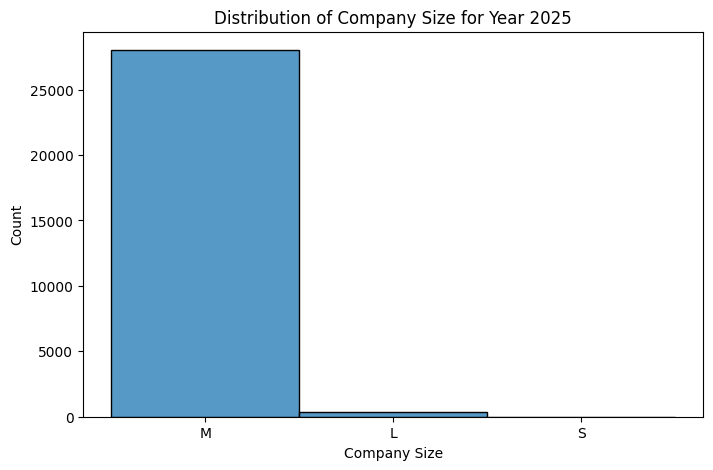

In [31]:
sa_2025 = sa[sa["work_year"] == 2025].copy()

if sa_2025.empty:
    print("No data available for work_year == 2025 to plot company_size.")
else:
    print("\nHistogram for work_year == 2025 only:")
    plt.figure(figsize=(8, 5))
    sns.histplot(sa_2025["company_size"])
    plt.title("Distribution of Company Size for Year 2025")
    plt.xlabel("Company Size")
    plt.ylabel("Count")  
    plt.show()

## 2. Salary Distribution


Histogram for work_year == 2025 only:


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


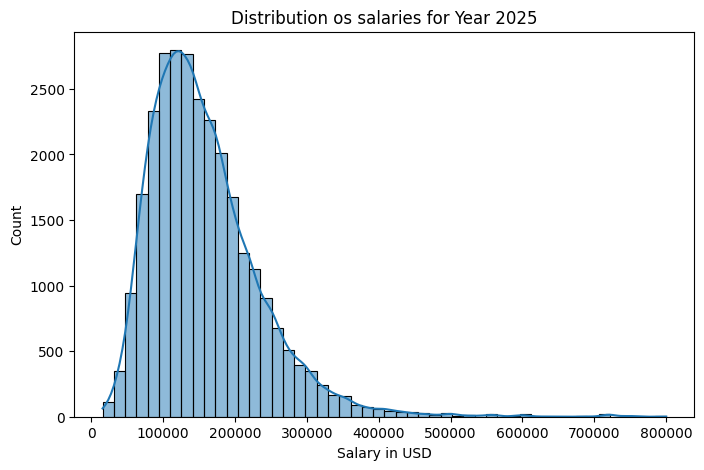

In [32]:
sa_2025 = sa[sa["work_year"] == 2025].copy()
if sa_2025.empty:
    print("No data available for work_year == 2025 to plot company_size.")
else:
    print("\nHistogram for work_year == 2025 only:")
    plt.figure(figsize=(8, 5))
    sns.histplot(sa_2025["salary_in_usd"], bins=50, kde=True)
    plt.title("Distribution os salaries for Year 2025")
    plt.xlabel("Salary in USD")
    plt.ylabel("Count")  
    plt.show()

## 3. Salary by Experience Level

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

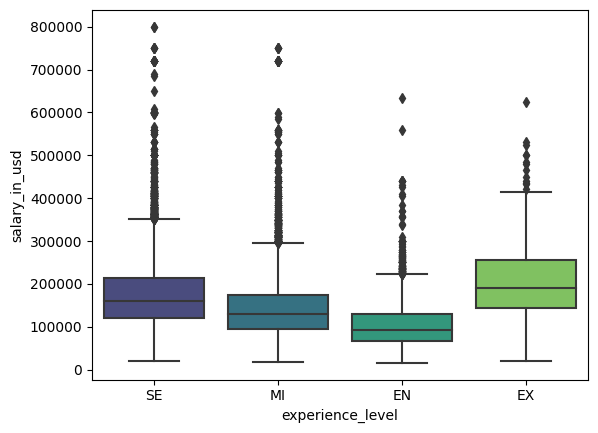

In [33]:
sns.boxplot(data = sa_2025, x="experience_level", y="salary_in_usd", palette="viridis")
# so many outliers

## 4. Average Salary by Country

<Axes: ylabel='company_location'>

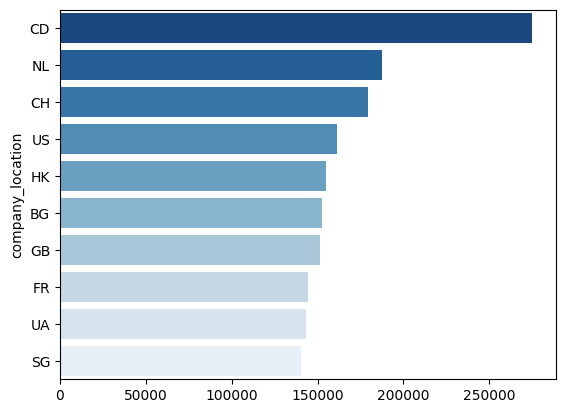

In [34]:
top_countries = sa_2025.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="Blues_r")

## 5. Heatmap: Salary vs Experience vs Company Size

Cross-dimension analysis to find hot salary spots

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: xlabel='company_size', ylabel='experience_level'>

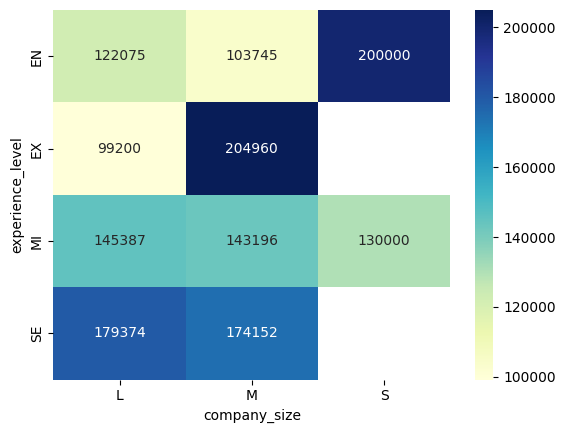

In [35]:
pivot = sa_2025.pivot_table(index="experience_level", columns="company_size", values="salary_in_usd", aggfunc="mean")
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")

## 6. Bar Plot of Top 10 Highest Paid Job Titles

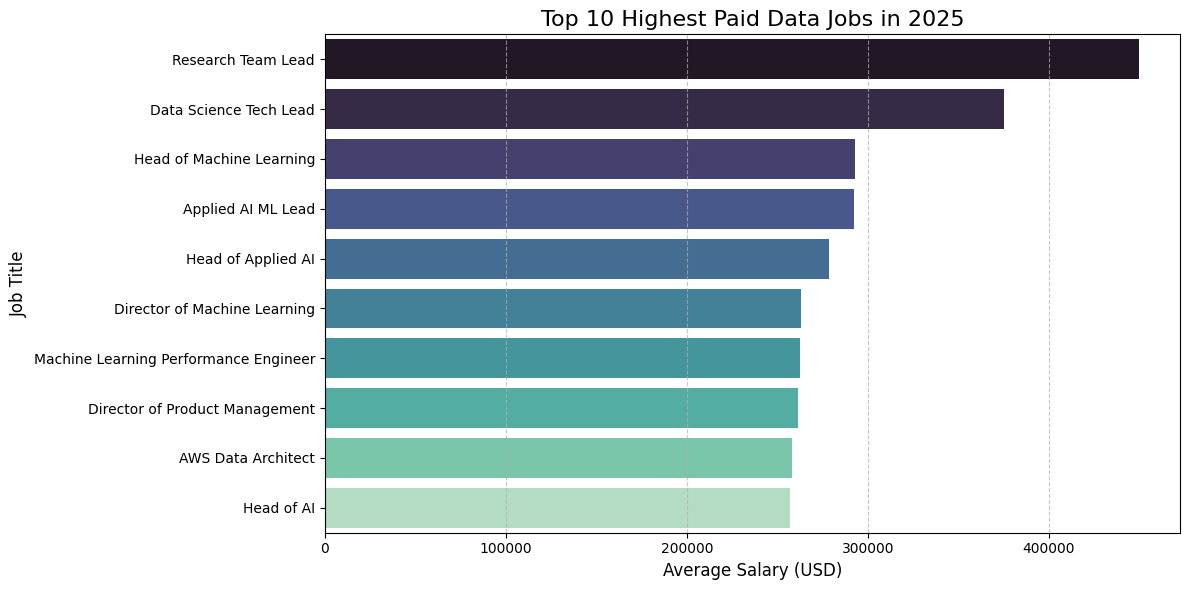

In [36]:
# Group by job title and get average salary
top_jobs = (sa.groupby("job_title")["salary_in_usd"]
              .mean()
              .sort_values(ascending=False)
              .head(10)
              .round(2))

plt.figure(figsize=(12, 6))
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="mako")

plt.title("Top 10 Highest Paid Data Jobs in 2025", fontsize=16)
plt.xlabel("Average Salary (USD)", fontsize=12)
plt.ylabel("Job Title", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 7. Remote Work & Salary

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

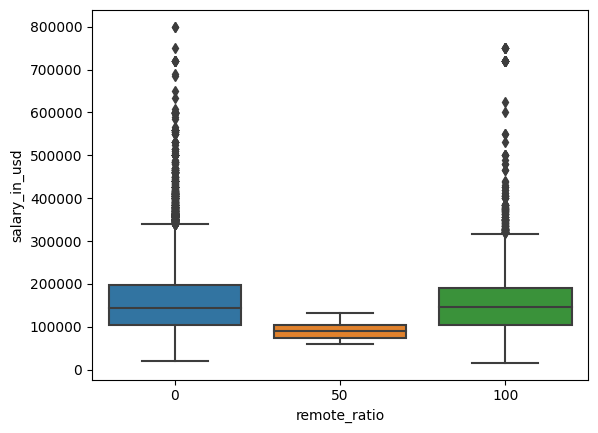

In [37]:
sns.boxplot(data=sa_2025, x="remote_ratio", y="salary_in_usd")

## 8.Salary Over Time by Experience Level

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

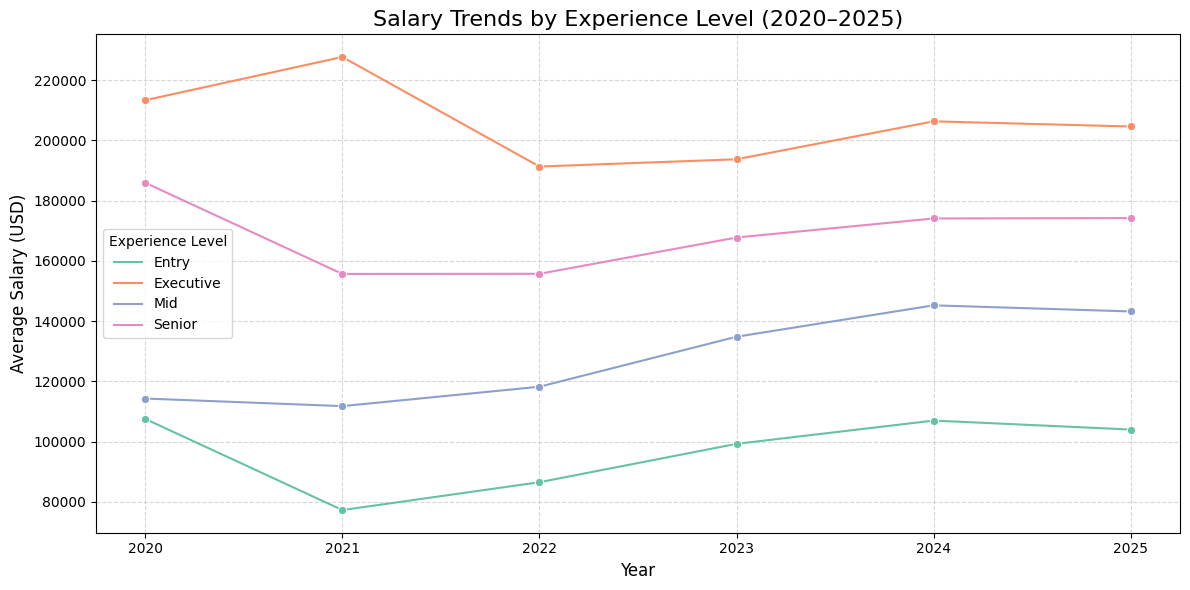

In [38]:
salary_over_time = (
    sa.groupby(["work_year", "experience_level"])["salary_in_usd"]
    .mean()
    .reset_index()
)

# map experience levels to full names for clarity
exp_map = {"EN": "Entry", "MI": "Mid", "SE": "Senior", "EX": "Executive"}
salary_over_time["experience_level"] = salary_over_time["experience_level"].map(exp_map)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=salary_over_time,
    x="work_year",
    y="salary_in_usd",
    hue="experience_level",
    marker="o",
    palette="Set2"
)

plt.title("Salary Trends by Experience Level (2020–2025)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Salary (USD)", fontsize=12)
plt.xticks(salary_over_time["work_year"].unique())
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Experience Level")
plt.tight_layout()
plt.show()